## Lots of Imports for tools that would normally be used in a project

In [44]:
import env
import os
import acquire
import prepare
import numpy as np
import pandas as pd
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,\
precision_score,\
recall_score,\
classification_report,\
confusion_matrix
from sklearn.tree import\
DecisionTreeClassifier as dt,\
plot_tree,\
export_text

## Questions

Using the titanic data, in your classification-exercises repository, create a notebook, <i>decision_tree.ipynb</i> where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

When max depths was changed from 3 to 4, changes in: 
- precision
- accuracy
- macro avg
- weighted avg
\
Were noticed.
Other changes were not as significant.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

## Acquire and Prepare Data

In [45]:
# acquiring and preparing data
# prep_titanic has acquire built in
titanic = prepare.prep_titanic()

In [46]:
t_train, t_validate, t_test  = prepare.splitter(titanic,target='survived')

In [47]:
t_train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,male,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,1,1.0,0.0,0.0
165,165,1,3,male,9.0,0,2,20.5250,S,0,1.0,0.0,1.0
50,50,0,3,male,7.0,4,1,39.6875,S,0,1.0,0.0,1.0
259,259,1,2,female,50.0,0,1,26.0000,S,0,0.0,0.0,1.0
306,306,1,1,female,30.0,0,0,110.8833,C,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,1,1.0,0.0,1.0
636,636,0,3,male,32.0,0,0,7.9250,S,1,1.0,0.0,1.0
222,222,0,3,male,51.0,0,0,8.0500,S,1,1.0,0.0,1.0
485,485,0,3,female,30.0,3,1,25.4667,S,0,0.0,0.0,1.0


## Determining Baseline

In [139]:
t_train['survived'].value_counts()
baseline_accuracy = (t_train.survived == 0).mean()
baseline_accuracy

survived
0    307
1    191
Name: count, dtype: int64

## Model 1 Defined

In [143]:
# finding baseline accuracy to compare to predictions
t_train['label'] = ['survived'] == '0'

0.6164658634538153

In [50]:
# setting parameters for decision tree
clf = dt(max_depth=3,random_state=4343)

In [96]:
# model 1
x_t_train = t_train.drop(columns=['survived','label','sex','embarked'])
y_t_train = t_train[['survived']]

## Fit and Train Model

In [144]:
clf = clf.fit(x_t_train, y_t_train)

In [145]:
model1_predictions = clf.predict(x_t_train)

## Confusion Matrix

In [146]:
#pd.DataFrame(
#    confusion_matrix(y_t_train,model1_predictions),
#    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
#)

confusion_matrix(y_t_train,model1_predictions)

array([[277,  30],
       [ 57, 134]])

## Classification Report

In [147]:
pd.DataFrame(classification_report(y_t_train,model1_predictions,output_dict=True)).T

,precision,recall,f1-score,support
0,0.829341,0.902280,0.864275,307.000000
1,0.817073,0.701571,0.754930,191.000000
accuracy,0.825301,0.825301,0.825301,0.825301
macro avg,0.823207,0.801925,0.809602,498.000000
weighted avg,0.824636,0.825301,0.822337,498.000000


In [148]:
t_train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,male,embarked_Q,embarked_S,label
583,583,0,1,male,36.0,0,0,40.1250,C,1,1.0,0.0,0.0,False
165,165,1,3,male,9.0,0,2,20.5250,S,0,1.0,0.0,1.0,False
50,50,0,3,male,7.0,4,1,39.6875,S,0,1.0,0.0,1.0,False
259,259,1,2,female,50.0,0,1,26.0000,S,0,0.0,0.0,1.0,False
306,306,1,1,female,30.0,0,0,110.8833,C,1,0.0,0.0,0.0,False


## Decision Tree Plotted

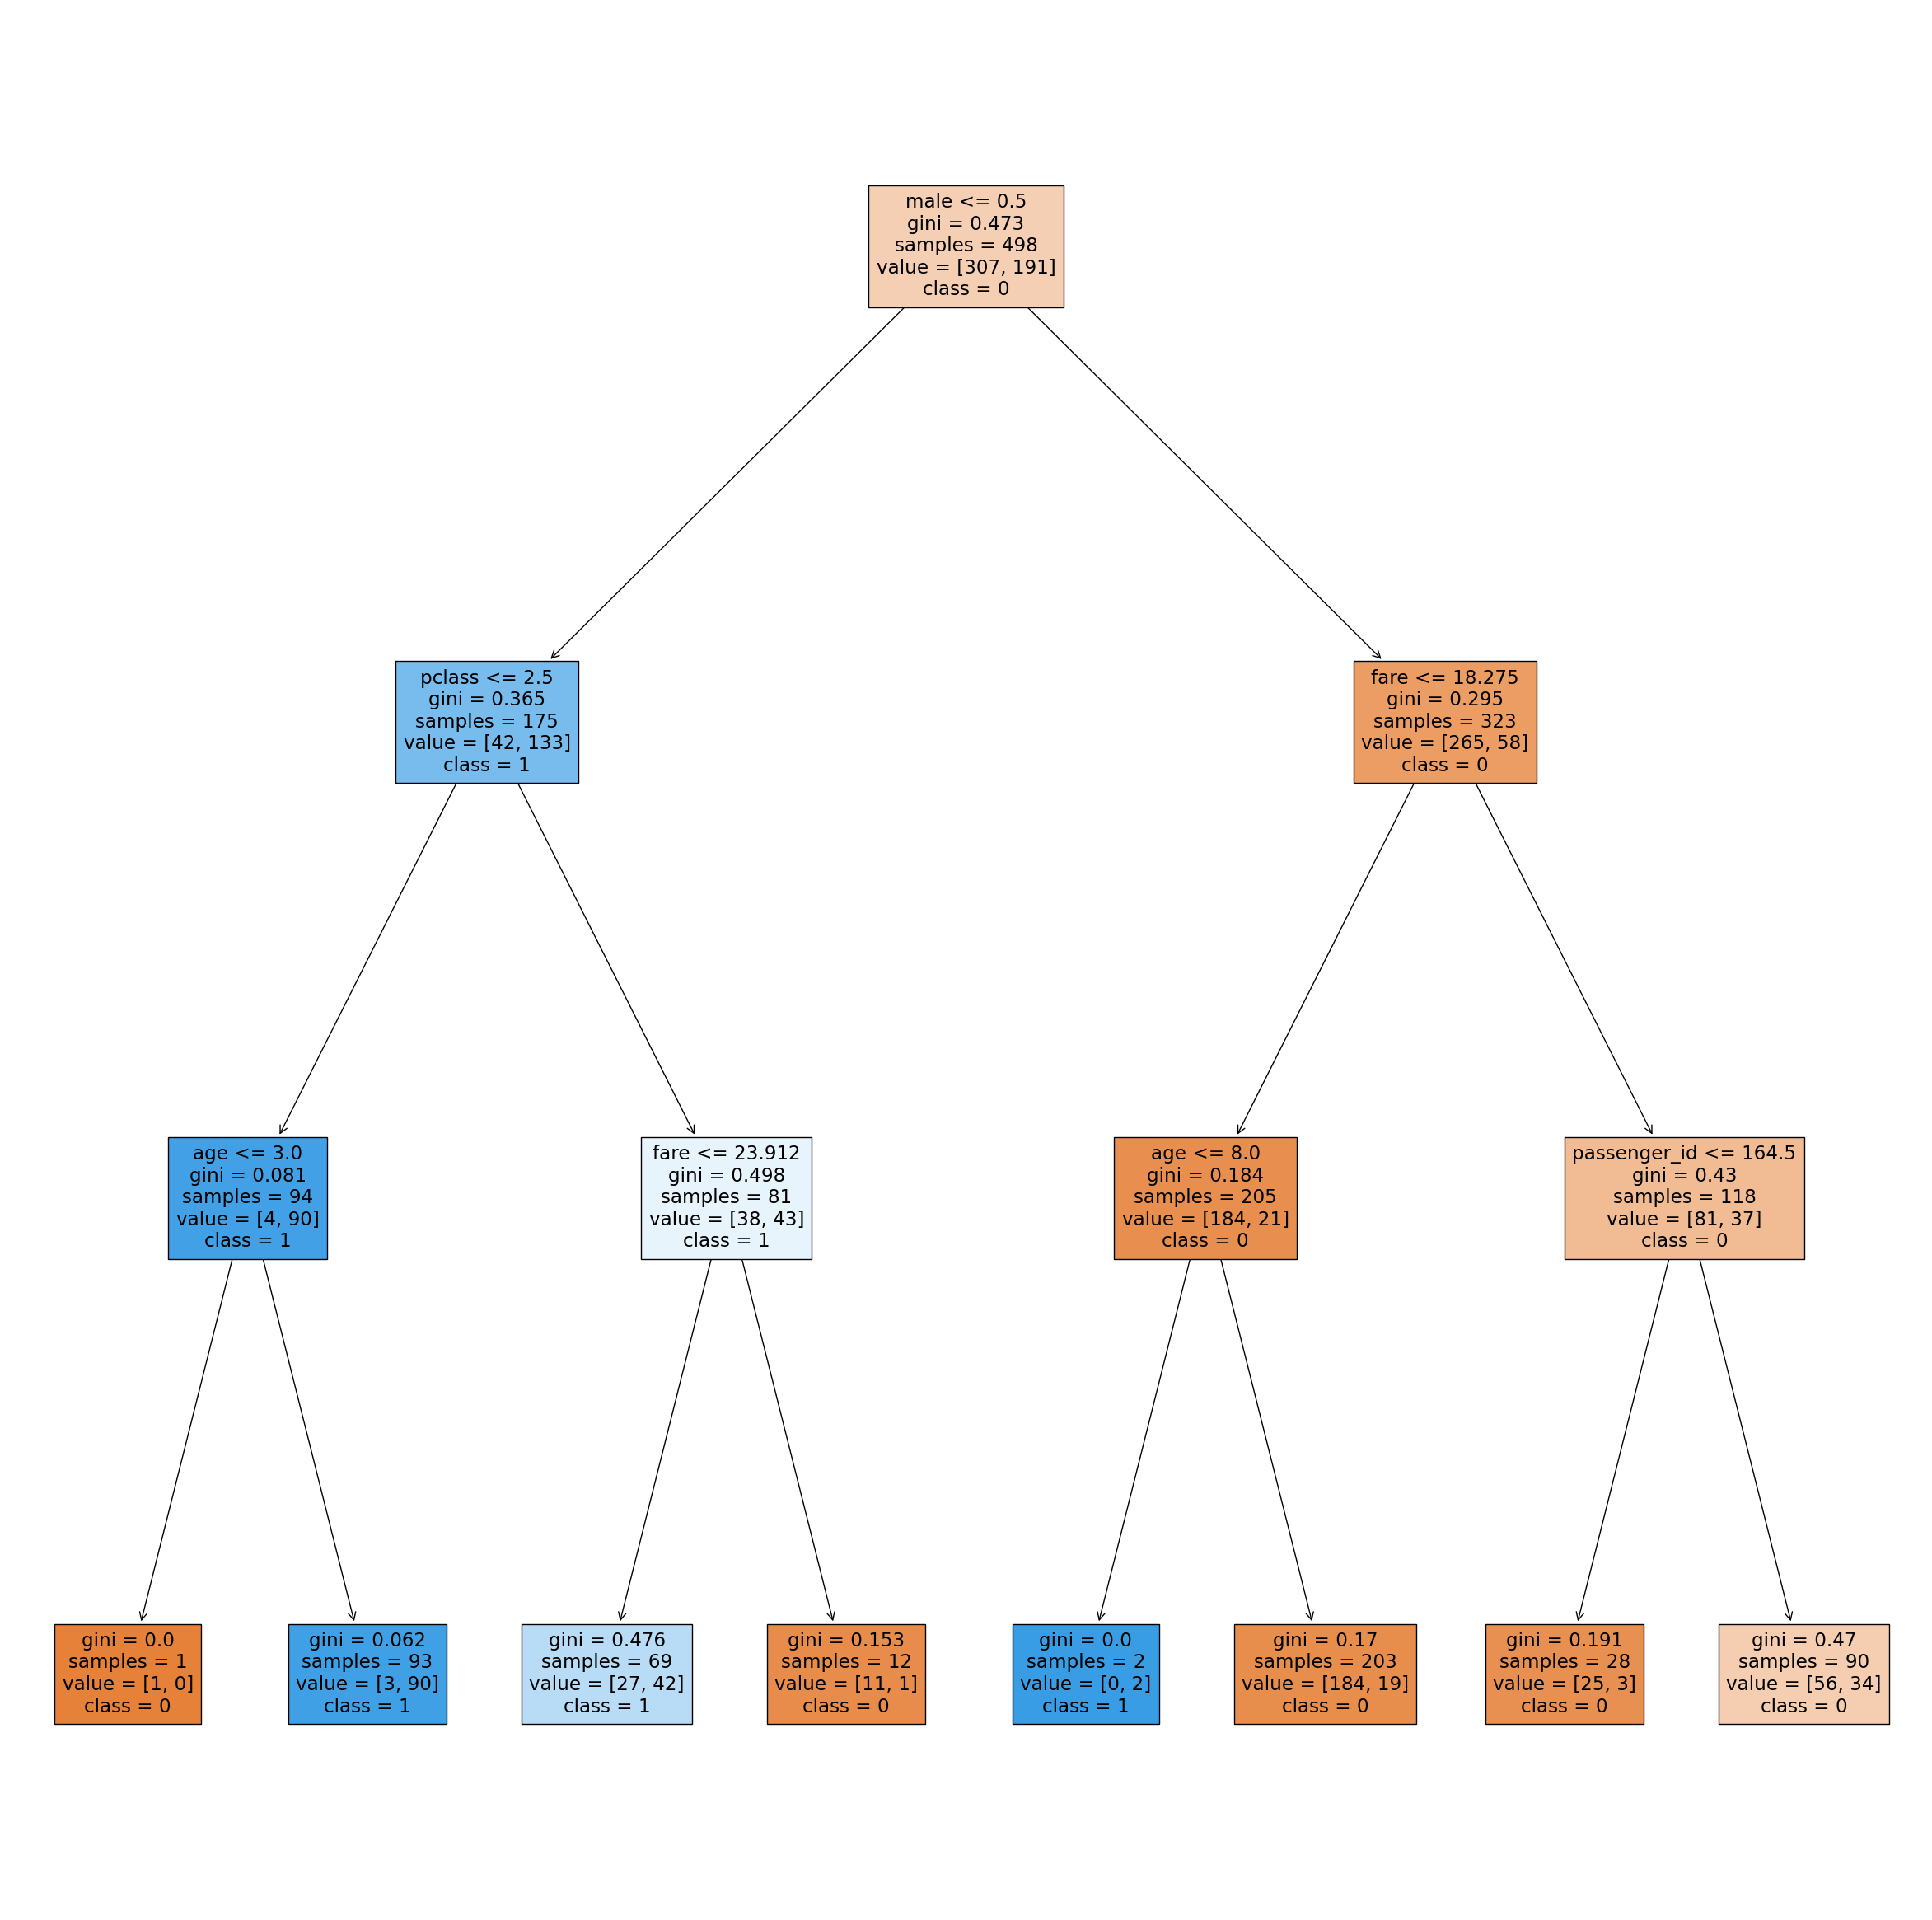

In [149]:
# Plot Tree Model 1
# Change __ to unique options of 
labels = list(t_train['survived'].astype(str))
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names=x_t_train.columns.to_list(), class_names=labels,filled=True)
plt.show()

## Validating Model 1

In [150]:
t_validate['label'] = t_validate['survived'] == 1

In [151]:
# Validating model 1
x_t_validate = t_validate.drop(columns=['survived','label','sex','embarked'])
y_t_validate = t_validate[['survived']]

In [152]:
model1_validation = clf.predict(x_t_validate)

In [153]:
pd.DataFrame(
    confusion_matrix(y_t_validate,model1_validation),
    columns = ['pred survived','pred opposite'], index=['actual opposite','actual survived']
)

,pred survived,pred opposite
actual opposite,116,16
actual survived,27,55


In [80]:
pd.DataFrame(classification_report(y_t_validate,model1_validation,output_dict=True)).T

,precision,recall,f1-score,support
0,0.811189,0.878788,0.843636,132.000000
1,0.774648,0.670732,0.718954,82.000000
accuracy,0.799065,0.799065,0.799065,0.799065
macro avg,0.792918,0.774760,0.781295,214.000000
weighted avg,0.797187,0.799065,0.795861,214.000000


In [91]:
clf_1 = dt(max_depth=3,random_state=4343)

## Creating Model 2

In [108]:
# Model 2
x_t_train1 = t_train[['age','male']]
y_t_train1 = t_train[['survived']]


In [109]:
clf_1.fit(x_t_train1,y_t_train1)

DecisionTreeClassifier(max_depth=3, random_state=4343)

In [111]:
model2_predictions = clf_1.predict(x_t_train1)

In [98]:
# classification report for precision, recall and f1-score
pd.DataFrame(classification_report(y_t_train1,model2_predictions,output_dict=True)).T

,precision,recall,f1-score,support
0,0.841935,0.850163,0.846029,307.000000
1,0.755319,0.743455,0.749340,191.000000
accuracy,0.809237,0.809237,0.809237,0.809237
macro avg,0.798627,0.796809,0.797685,498.000000
weighted avg,0.808715,0.809237,0.808946,498.000000


In [112]:
clf_1.score(x_t_train1, y_t_train1)

0.8092369477911646

In [124]:
x_t_train1.columns.tolist()

['age', 'male']

# Model 2 Plot Tree

In [ ]:
# Plot Tree Model 2
labels = list(t_train['survived'].astype(str))
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names=x_t_train1.columns.tolist(), class_names=labels)
plt.show()

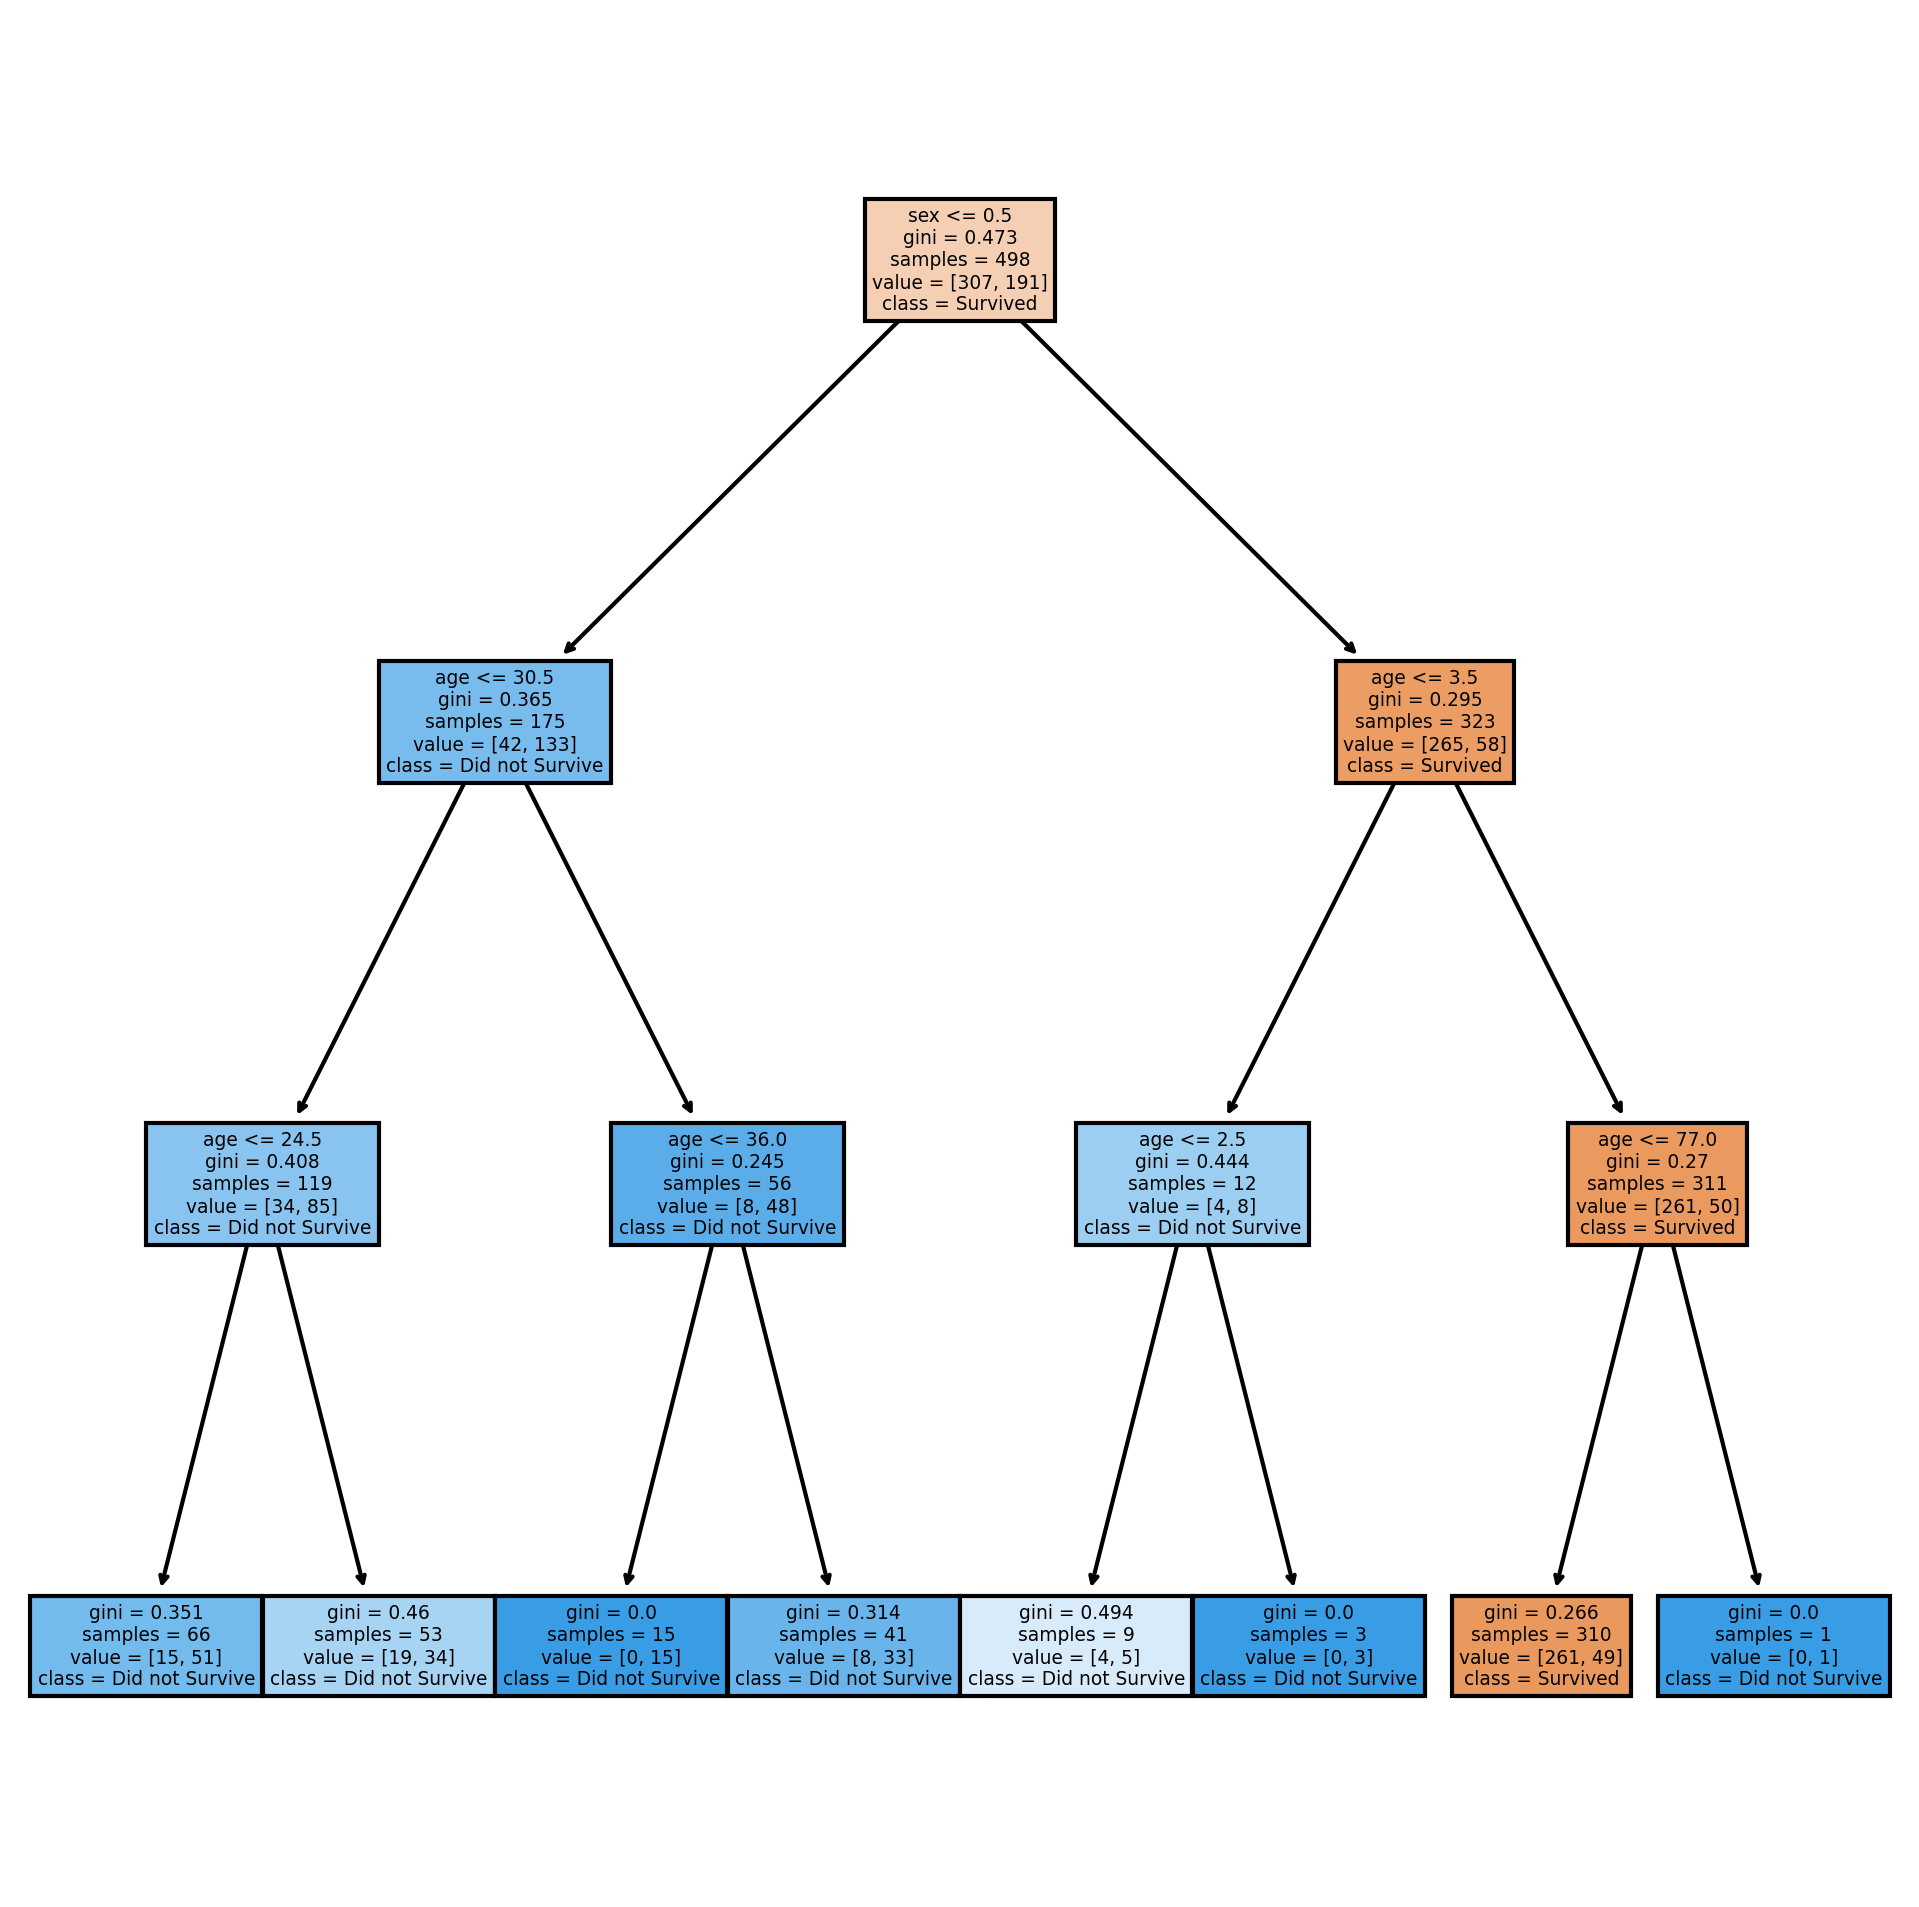

In [137]:
fn = ['age','sex']
cn = ['Survived','Did not Survive']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
plot_tree(clf_1,feature_names=fn,class_names=cn, filled=True)
plt.show()